In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler


In [2]:
# read data

# dataset
## import datetime
dt = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\datetime.csv', delimiter=';')
#Time

## import variables
df = pd.read_csv(r'C:\Users\Marina\Desktop\heat_pump\01.Trekanten\02.outputs\trekantenEMA01_ffill.csv', delimiter=';')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Time'], axis=1)

df.tail()

,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,temperature_c2.2,...,exp_valve_c2,superheat_c1,superheat_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
787616,9.8,12.3,30.1,37.9,34.1,30.6,31.1,17.6,77.50,39.05,...,53.0,4.15,10.70,40.0,0.0,37.0,23.3,11.1,10.7,7.7
787617,9.4,11.9,30.1,38.0,34.1,30.6,31.1,17.6,78.15,39.80,...,54.5,4.60,9.30,40.0,0.0,37.2,24.4,10.8,10.7,7.9
787618,8.9,11.4,30.1,37.7,34.1,30.6,31.1,17.6,77.70,39.45,...,55.5,5.20,9.20,40.0,0.0,37.6,23.1,10.6,10.7,7.7
787619,8.3,10.7,30.4,38.2,34.4,30.6,31.4,17.6,77.70,40.00,...,55.0,6.20,8.25,40.0,0.0,37.6,24.2,10.3,10.7,7.9
787620,7.1,9.6,30.1,37.9,34.4,30.6,31.4,17.6,76.80,39.50,...,55.0,7.50,7.70,40.0,0.0,37.6,23.4,9.9,10.4,7.6


In [3]:
dt = pd.to_datetime(dt['Time'], format='%Y-%m-%d %H:%M:%S')
dt = dt[:787621]
dt.tail()

787616   2021-06-30 23:56:00
787617   2021-06-30 23:57:00
787618   2021-06-30 23:58:00
787619   2021-06-30 23:59:00
787620   2021-07-01 00:00:00
Name: Time, dtype: datetime64[ns]

In [4]:
titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'superheat_c1', 'superheat_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']
selected_titles = ['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2','temperature_c1.1', 'temperature_c1.2', 'temperature_c1.3', 'temperature_c1.4', 'temperature_c2.1', 'temperature_c2.2', 'temperature_c2.3', 'temperature_c2.4', 'C1a', 'C1b', 'C2a', 'C2b', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1', 'pressure_t1.c1', 'pressure_t2.c1', 'pressure_t1_c2', 'pressure_t2.c2']

In [5]:
df = df[selected_titles][:27041]
dt = dt[:27041]

#df = df[selected_titles][:100000]
#dt = dt[:100000]

In [6]:
dataset = pd.concat([dt,df], axis = 1)
dataset.head()

,Time,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,temperature_c1.1,temperature_c1.2,temperature_c1.3,temperature_c1.4,temperature_c2.1,...,water_flow_c1,exp_valve_c1,exp_valve_c2,water_flow_SS1,temperature_TS1_SS1,temperature_TS2_SS1,pressure_t1.c1,pressure_t2.c1,pressure_t1_c2,pressure_t2.c2
0,2020-01-01 00:00:00,4.6,7.3,37.7,43.1,85.900000,42.30,14.411111,7.5,85.277778,...,40.0,32.0,31.0,100.0,14.5,32.6,24.9,5.9,24.8,5.9
1,2020-01-01 00:01:00,4.6,7.3,37.8,43.1,85.922222,42.30,14.555556,7.5,85.188889,...,40.0,32.0,31.0,100.0,14.6,32.6,24.9,5.9,24.8,5.9
2,2020-01-01 00:02:00,4.6,7.3,37.7,43.1,86.000000,42.35,14.512500,7.5,85.125000,...,40.0,32.0,31.0,100.0,14.6,32.7,24.9,5.9,24.8,5.9
3,2020-01-01 00:03:00,4.6,7.3,37.8,43.1,85.880000,42.34,14.510000,7.5,85.200000,...,40.0,32.0,30.9,100.0,14.5,32.7,24.9,5.9,24.8,5.9
4,2020-01-01 00:04:00,4.6,7.3,37.8,43.1,85.950000,42.30,14.425000,7.5,85.287500,...,40.0,32.0,31.0,100.0,14.5,32.7,24.9,5.9,24.8,5.9


In [7]:
#input
df_input =df[['temperature_cs1_c1', 'temperature_cs1_c2', 'temperature_HS1_c1', 'temperature_HS1_c2', 'water_flow_c2', 'water_flow_c1', 'exp_valve_c1', 'exp_valve_c2', 'C1a', 'C1b']]#, 'water_flow_SS1', 'temperature_TS1_SS1', 'temperature_TS2_SS1']]

df_output = df[['pressure_t2.c1']]

df_window = df[['C1a', 'C1b', 'C2a', 'C2b']]

## all inputs and outputs together
df = pd.concat([df_input, df_output], axis = 1)
df.head()


,temperature_cs1_c1,temperature_cs1_c2,temperature_HS1_c1,temperature_HS1_c2,water_flow_c2,water_flow_c1,exp_valve_c1,exp_valve_c2,C1a,C1b,pressure_t2.c1
0,4.6,7.3,37.7,43.1,50.0,40.0,32.0,31.0,1.0,0.0,5.9
1,4.6,7.3,37.8,43.1,50.0,40.0,32.0,31.0,1.0,0.0,5.9
2,4.6,7.3,37.7,43.1,50.0,40.0,32.0,31.0,1.0,0.0,5.9
3,4.6,7.3,37.8,43.1,50.0,40.0,32.0,30.9,1.0,0.0,5.9
4,4.6,7.3,37.8,43.1,50.0,40.0,32.0,31.0,1.0,0.0,5.9


In [8]:
def create_dataset(dataset, look_back = 1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 10]) # my output variable
    return np.array(X), np.array(Y)

In [9]:
# fix random seed for reproducibility

np.random.seed(7)

In [10]:
# normalize data

scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(df)


print(features)

[[0.51798561 0.875      0.63253012 ... 1.         0.         0.20512821]
 [0.51798561 0.875      0.63855422 ... 1.         0.         0.20512821]
 [0.51798561 0.875      0.63253012 ... 1.         0.         0.20512821]
 ...
 [0.57553957 0.88888889 0.60240964 ... 1.         0.         0.35897436]
 [0.56834532 0.88888889 0.63855422 ... 1.         0.         0.35897436]
 [0.56834532 0.88888889 0.65060241 ... 0.         0.         0.46153846]]


In [11]:
# split the data
feature_size = len(features)
train_size = int(len(features)*0.65)
test_size = len(features) - train_size
train, test = features[0:train_size, :], features[train_size:len(features),:]
print(len(train), len(test))

17576 9465


In [12]:
# reshape into X = t and Y = t+1

look_back = 720 # half a day
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)


In [13]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 11))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 11))


In [33]:
# MODEL 03

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_dim = 11, return_sequences = True), 
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(), # learning rate = 0.0001
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(X_train,
                    Y_train,
                    epochs = 50, #100,
                    validation_data = (X_test,Y_test),
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, min_delta = 0)]
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 64)          19456     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 31,905
Trainable params: 31,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
527/527 [==============================] - 260s 489ms/step - loss: 0.6974 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 2/50
527/527 [==============================] - 258s 490ms/step - loss: 0.2156 - accurac

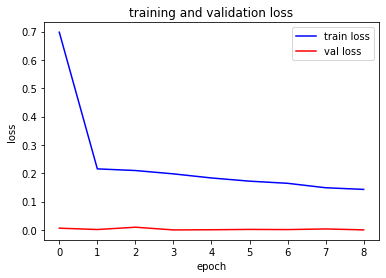

final val loss:  [0.006470853462815285, 0.0017518799286335707, 0.009847842156887054, 0.00034813277306966484, 0.0009403526782989502, 0.0021022616419941187, 0.0015450165374204516, 0.003774820128455758, 0.0005445251590572298]


In [34]:
# visualize the losses 

def visualize_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='train loss')
    plt.plot(epochs, val_loss, 'r', label='val loss')
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    print('final val loss: ', val_loss)

visualize_loss(history, 'training and validation loss')

In [ ]:
# make predictions

trainPrediction = model.predict(X_train)
print(trainPrediction)

testPrediction = model.predict(X_test)
print(testPrediction)

[[0.17242742]
 [0.16801703]
 [0.16683635]
 ...
 [0.21100995]
 [0.21077695]
 [0.2108295 ]]
[[0.11530615]
 [0.11870897]
 [0.12259526]
 ...
 [0.2685523 ]
 [0.27344957]
 [0.2715886 ]]


In [ ]:
# need to transform the predictions back from normalization

# get something which has as many features as dataset
trainPrediction_extended = np.zeros((len(trainPrediction), 11))
# Put the predictions there
trainPrediction_extended[:,10] = trainPrediction[:,0]
# inverse transform it and select the last column
trainPrediction = scaler.inverse_transform(trainPrediction_extended)[:,10]
print(trainPrediction)

# get something which has as many features as dataset
testPrediction_extended = np.zeros((len(testPrediction), 11))
# Put the predictions there
testPrediction_extended[:,10] = testPrediction[:,0]
# inverse transform it and select the last column
testPrediction = scaler.inverse_transform(testPrediction_extended)[:,10]
print(testPrediction)

[5.77246692 5.75526642 5.75066177 ... 5.9229388  5.92203012 5.92223504]
[5.54969397 5.56296498 5.57812151 ... 6.14735398 6.16645332 6.15919552]


In [ ]:
print(len(testPrediction))
#print(len(testPredictionPlot))

8744


In [ ]:
Y_train_exteded =np.zeros((len(Y_train), 11))
Y_train_exteded[:,8] = Y_train
Y_train = scaler.inverse_transform(Y_train_exteded)[:,10]

Y_test_exteded =np.zeros((len(Y_test), 11))
Y_test_exteded[:,8] = Y_test
Y_test = scaler.inverse_transform(Y_test_exteded)[:,10]


In [ ]:
# shift train predictions for plotting
trainPredictionPlot = np.empty_like(features)
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(trainPrediction)+look_back, 10] = trainPrediction

# shift test predictions for plotting
testPredictionPlot = np.empty_like(features)
testPredictionPlot[:, :] = np.nan
testPredictionPlot[len(trainPrediction)+(look_back*2) +1:len(features)-1, 10] = testPrediction


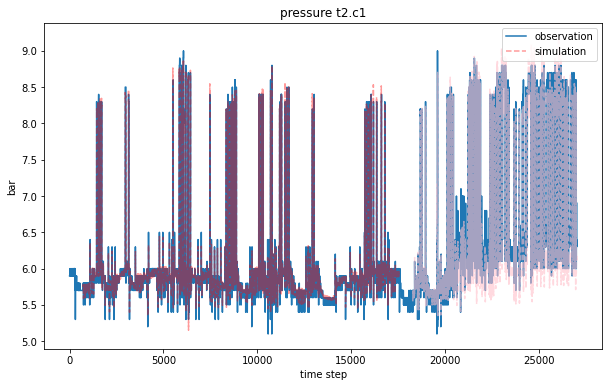

In [ ]:
# plot original

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(features)[:,10])
#plt.plot(scaler.inverse_transform(features[train_size:])[:,8], linestyle = '-')  
plt.plot(trainPredictionPlot, 'r', linestyle='--', alpha = 0.4)  
plt.plot(testPredictionPlot, 'pink', linestyle='--', alpha = 0.6)
plt.title('pressure t2.c1')
plt.ylabel('bar')
plt.xlabel('time step')
plt.legend(['observation','simulation'], loc='upper right')


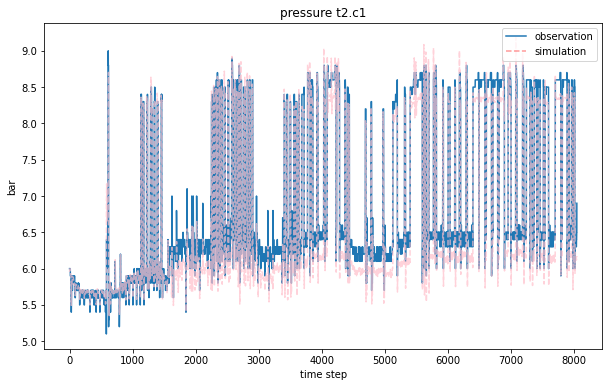

In [ ]:
# plot original
zoom = 19000
end = 82000

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(features)[:,10][zoom:])
#plt.plot(scaler.inverse_transform(features[train_size:])[:,8], linestyle = '-')  
plt.plot(trainPredictionPlot[zoom:], 'r', linestyle='--', alpha = 0.4)  
plt.plot(testPredictionPlot[zoom:], 'pink', linestyle='--', alpha = 0.7)
plt.title('pressure t2.c1')
plt.ylabel('bar')
plt.xlabel('time step')
plt.legend(['observation','simulation'], loc='upper right')